# Project-Text Classification

Importing Important Libraries
I have imported the stopwords from nltk and copied more of them from internet
Instead of split() function, I am using the tokenizer which makes the job much easier.
Instead of manually downloading the data from the internet, I have downloaded it using sklearn.datasets.fetch_20newsgroups

In [94]:
from sklearn.datasets import fetch_20newsgroups
newsgroups=fetch_20newsgroups()

In [67]:
import string
from nltk.corpus import stopwords
stops=set(stopwords.words('english'))
#these are the stopwords which we don't want to include in out vocabulary.
punctuations=list(string.punctuation)
#punctuation marks also should be removed from our vocabulary.
stops.update(punctuations)
len(stops)

211

In [79]:
#later on while debugging the code i realised that there are more stop words still residing there in these documents apart from
#those i have already included.
# so i copied more stop words from the internet and imported them using numpy.loadtxt() and updated my set of stop words.
more_stops=np.loadtxt("stops.txt", dtype=str, delimiter=" ")
stops.update(more_stops)
len(stops)
#now we have these many stop words...

517

In [80]:
from nltk.tokenize import word_tokenize
newsgroups.keys()
#now we have all the unnecessary words and punctuation marks in our set "stops"
#lets check what keys do we have in our data.

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [81]:
len(newsgroups.data)

11314

In [82]:
documents=newsgroups.data
categories=newsgroups.target
all_words=[]
#this variable is going to contain all the words from all documents.
for doc in documents:
    words=word_tokenize(doc)#i have modified the document to a form in which we have list of words(tokenized data for each document)
    for word in words:
        if (word.lower() not in stops) and len(word)!=1 and len(word)!=2 and word[0]!="'" and word!="n't" and word[0]!=".":
            #I dont't want to include words with length 1 and 2 in my vocabulary because these words are pretty much useless.
            # and they might either be the stops which are not there in "stops" variable or some punctuation marks which are
            # not there in "punctuations" variable. apart from the words of length 1 and 2 i have also removed some words
            # separately because these words are most probably present in all the documents so they are not helping us much in
            # classification.
            all_words.append(word)

In [83]:
len(all_words)

1565641

In [84]:
dic=dict()
for word in all_words:
    if word in dic.keys():
        dic[word]+=1
    else:
        dic[word]=1
#Now in the "dic" variable we have the frequencies of all the elements of the list "all words".

In [85]:
import numpy as np
freq=np.array([i for i in dic.values()])
words=np.array([i for i in dic.keys()])
len(freq)

195918

In [86]:
words=words[np.argsort(freq)][::-1]
freq=freq[np.argsort(freq)][::-1]
#now i have sorted both the arrays and first arranged them in ascending order using np.sort() and np.argsort() and then i have
# reversed the so obtained array to get a descending ordered array.

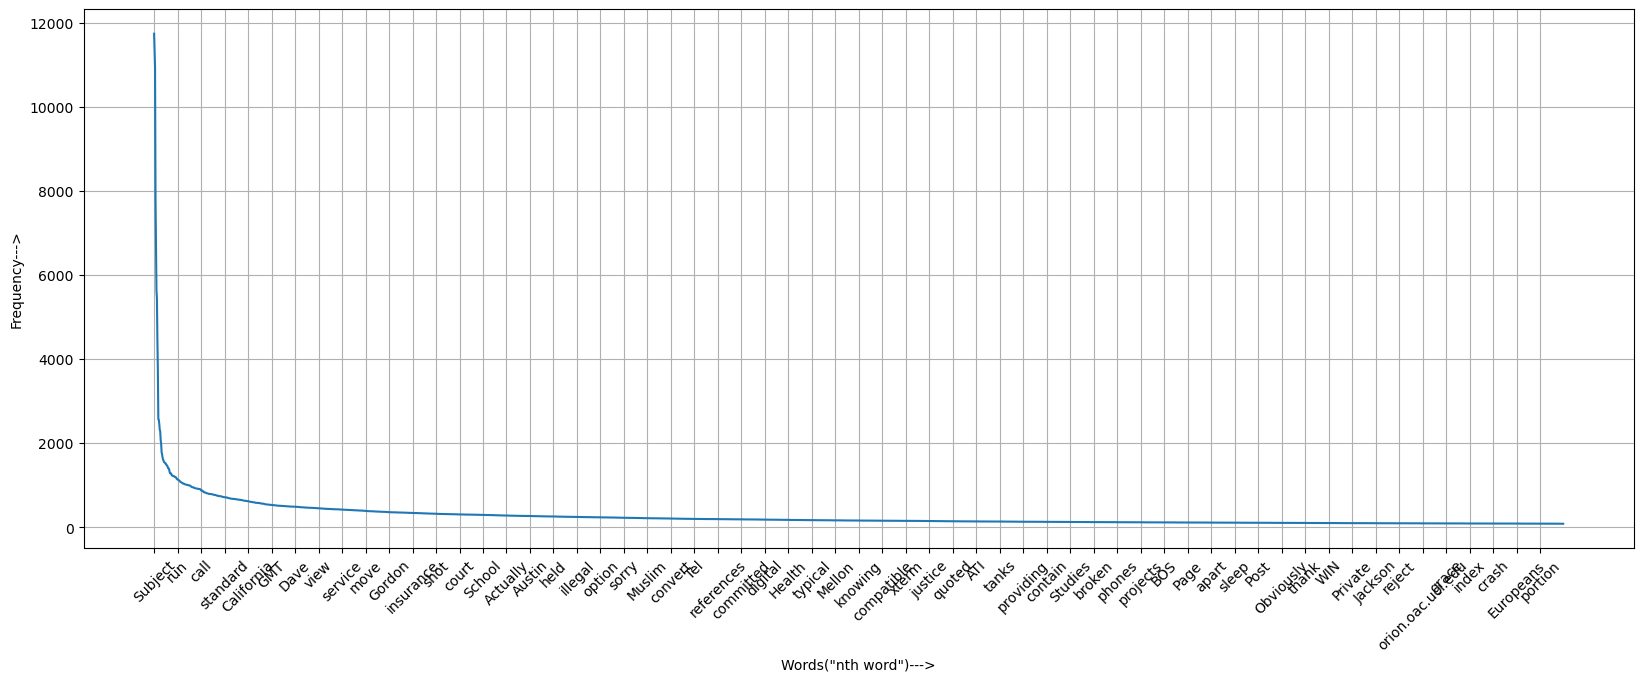

In [87]:
#This cell draws a frequency distribution graph for us to from where we can carefully observe the frequency trend of out list.
import matplotlib.pyplot as plt
#following are the limits for our graph.
lower_limit=0    #default
upper_limit=3000    #default
difference_between_each_xtick=50  #default value. change these values to observe the graph in more depth
#adjusting size of the graph for more clearity.
plt.figure(figsize=(20, 7))
#plotting
plt.plot(words[lower_limit:upper_limit], freq[lower_limit:upper_limit])
#labelling
plt.xlabel('Words("nth word")--->')
plt.ylabel("Frequency--->")
#adjusting the xticks
plt.xticks(np.arange(lower_limit, upper_limit, 50), rotation=45)
plt.grid()
plt.show()
#observe the following graph by changing the values of lower_limit, upper_limit and difference_between_each_xtick.

In [88]:
features=words[20:4000]
#features variable contains all the top words which are most frequently used in all our documents. 
freq[20], freq[3999]
# since there are 11314 documents I don't want the very high frequency words to get into my final features list as
# they may be present in all the documents which will not help me much for classiication.
# so i have choosen the words having frequency freq[20] to freq[3999]

(1586, 62)

In [90]:
# This cell is the backbone of our Text Classification.
# It takes the patameters documents and the list of all features and converts it into a TEXT-CLASSIFICATION-FRIENDLY structure.
# By text-classification-friendly, I mean it converts the data into a 2-D array which contains the frequency of that feature
# in that perticular document. where rows are the documents and columns are the features.
training=np.zeros((len(documents),len(features)))
for i in range(len(documents)):
    current_doc=word_tokenize(documents[i])
    for word in current_doc:
        if word in features:
            for j in range(len(features)):
                if features[j]==word:
                    training[i][j]+=1

In [91]:
training

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [92]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(training,categories)
#splitting these documents in train and test data.

In [93]:
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB()
clf.fit(x_train,y_train)
clf.score(x_test, y_test)
#it seems like a descent score to me beacause we haven't used real text classification algorithms like NLP and all.

0.8211382113821138